In [103]:
#Homework 6
#Mackenzie James
#Due: 3/6/20

#Modeled off of template, got help from Rixin in office hours
#Collaborated with: Madison Walder

In [104]:
#import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

#import modules from previous homework 
from ReadFile import Read
from CenterOfMass import CenterOfMass

#import modules for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# 2. Looping over all files

In [112]:
#function that loops over all the snapshots to compute the center of mass 
#position and velocity as a function of time

def OrbitCOM(galaxy,start,end,n=5):
#inputs: 
    #galaxy- the name of the galaxy
    #start- the number of the first snapshot read in
    #end - the number of the last snapshot read in
    #n- integer of which intervals the center of mass will be returned- 5 for this code
#returns:
    # a file 
    
    #filename for the file that will store the orbit
    fileout = "Orbit_" + galaxy + ".txt"
    
    #set delta and VolDec
    #delta = CenterOfMass() <-- I am still not sure if these are hard coded values or not
    
    #array to store snapshot id sequence
    snap_ids = np.arange(start,end,5)
    
    #array to store time,x,y,z,Vx,Vy,Vz of COM of each galaxy at each snapshot
    orbit = np.zeros([len(snap_ids),7]) 

    #should have the same # of rows as amount of snap shots and 7 columns
    
    #for loop to compute COM position and velocities at each snapshot
    for i, snap_id in enumerate(snap_ids):
        
        #add a string of the filenumber to the value "000"
        ilbl = '000' + str(snap_ids[i])
        #remove all but the last 3 digits
        ilbl = ilbl[-3:]
        #define filename for galaxy based on path of files- dependent on which galaxy you want to make a file for 
        filename = "/Users/mmjames/M33_VLowRes/"+"%s_"%(galaxy) + ilbl + '.txt' 
        #create center of mass object using disk particles --> type 2?
        COM = CenterOfMass(filename, 2)
        #create instance of center of mass position and velocity, VolDec = 2 for MW and M31, 4 for M33
        COM_pos = COM.COM_P(0.1,4) 
        COM_vel = COM.COM_V(COM_pos[0], COM_pos[1], COM_pos[2])
        
        #store time in Gyr in first column of orbit
        orbit[i] = (COM.time.value/1000), *tuple(COM_pos.value), *tuple(COM_vel.value) 
        #print(snap_id) - keeps track of files being made if needed                                    
    #save orbit to a file
    np.savetxt(fileout, orbit, header='t x y z vx vy vz', comments='#',
              fmt=['%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f',])
   
    return


In [107]:
MW = OrbitCOM("MW",0,805) # -> How I made Orbit_MW text file from snapshots 0 to 800

In [109]:
M31 = OrbitCOM("M31",0,805) # -> How I made Orbit_M31 text file from snapshots 0 to 800

In [113]:
M33 = OrbitCOM("M33",0,805) # -> How I made Orbit_M33 text file from snapshots 0 to 800

# 3. Plotting

In [114]:
### Starting only with M31 and MW first to get it done 
#read in generated COM data files 
MWdata = np.genfromtxt("Orbit_MW.txt",dtype=None,names=True,skip_header=0)
M31data = np.genfromtxt("Orbit_M31.txt",dtype=None,names=True,skip_header=0)
M33data = np.genfromtxt("Orbit_M33.txt",dtype=None,names=True,skip_header=0)

# function to calculate differences in magnitude of two vectors 
def VecDif(a,b):
#inputs: 
    #a,b placeholder values of a given 3 component vector 
#returns:
    #differences in magnitudes of vector a and b
    
    magx = np.abs(b[0]-a[0])
    magy = np.abs(b[1]-a[1])
    magz = np.abs(b[2]-a[2])
    
    MagDif = np.sqrt((magx**2)+(magy**2)+(magz**2))
    
    return MagDif


#time array in Gyr
time = MWdata['t']

#data for milky way position and velocity over time
MWx = np.array(MWdata['x'])
MWy = np.array(MWdata['y'])
MWz = np.array(MWdata['z'])
MWvx = np.array(MWdata['vx'])
MWvy = np.array(MWdata['vy'])
MWvz = np.array(MWdata['vz'])
#initializing empty 2D array for position and velocity vectors
MWpos = np.zeros([161,3])
MWvel = np.zeros([161,3])

#data for M31 position and velocity over time
M31x = np.array(M31data['x'])
M31y = np.array(M31data['y'])
M31z = np.array(M31data['z'])
M31vx = np.array(M31data['vx'])
M31vy = np.array(M31data['vy'])
M31vz = np.array(M31data['vz'])
#initializing empty 2D array for position and velocity vectors
M31pos = np.zeros([161,3])
M31vel = np.zeros([161,3])

#data for M33 position and velocity over time
M33x = np.array(M33data['x'])
M33y = np.array(M33data['y'])
M33z = np.array(M33data['z'])
M33vx = np.array(M33data['vx'])
M33vy = np.array(M33data['vy'])
M33vz = np.array(M33data['vz'])
#initializing empty 2D array for position and velocity vectors
M33pos = np.zeros([161,3])
M33vel = np.zeros([161,3])

#initalizing arrays to hold the values for the difference in position and 
#the relative velocity between the milky way and M31
POS_mw_m31 = np.zeros(161)
VEL_mw_m31 = np.zeros(161)

#initalizing arrays to hold the values for the difference in position and 
#the relative velocity between the M31 and M33
POS_m31_m33 = np.zeros(161)
VEL_m31_m33 = np.zeros(161)

#for loop that will create an array the position and velocity vectors for
#all galaxies in order to find difference in postion and relative velocity
#using function for calculating difference in magnitude of vecots

for i in range(161):
    
    ### Milky way and M31 ###
    
    #MW x,y,z position
    MWpos[i] = [MWx[i],MWy[i],MWz[i]]
    #M31 x,y,z position
    M31pos[i] = [M31x[i],M31y[i],M31z[i]]
    #difference in position
    POS_mw_m31[i] = VecDif(MWpos[i],M31pos[i])
    
    #MW x,y,z velocity components
    MWvel[i] = [MWvx[i],MWvy[i],MWvz[i]]
    #M31 x,y,z velocity components
    M31vel[i] = [M31vx[i],M31vy[i],M31vz[i]]
    #relative velocity 
    VEL_mw_m31[i] = VecDif(MWvel[i],M31vel[i])
    
    ### M31 and M33 ###
    
    #M31 x,y,z position
    M31pos[i] = [M31x[i],M31y[i],M31z[i]]
    #M33 x,y,z position
    M33pos[i] = [M33x[i],M33y[i],M33z[i]]
    #difference in position
    POS_m31_m33[i] = VecDif(M31pos[i],M33pos[i])
    
    #M31 x,y,z velocity components
    M31vel[i] = [M31vx[i],M31vy[i],M31vz[i]]
    #M33 x,y,z velocity components
    M33vel[i] = [M33vx[i],M33vy[i],M33vz[i]]
    #relative velocity 
    VEL_m31_m33[i] = VecDif(M31vel[i],M33vel[i])
    


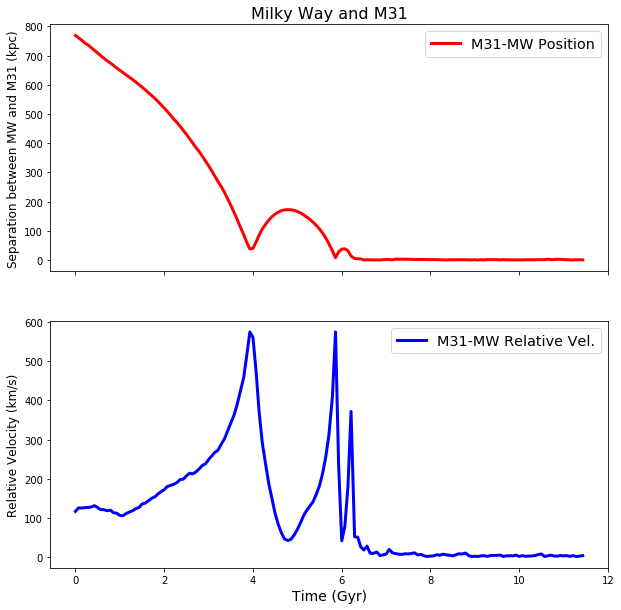

In [115]:
#plotting MW and M31 position and velocity

f,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10),sharex=True)
ax1.plot(time,POS_mw_m31,color='red',linewidth=3, label='M31-MW Position')
legend = ax1.legend(loc='upper right',fontsize='x-large')
ax1.set_ylabel('Separation between MW and M31 (kpc)', fontsize = 12)
ax1.set_title('Milky Way and M31', fontsize = 16)
ax2.plot(time,VEL_mw_m31,color='blue',linewidth=3, label='M31-MW Relative Vel.')
ax2.set_ylabel('Relative Velocity (km/s)', fontsize = 12)
ax2.set_xlabel('Time (Gyr)', fontsize = 14)
legend = ax2.legend(loc='upper right',fontsize='x-large')
plt.show()

f.savefig("MW_M31.png")

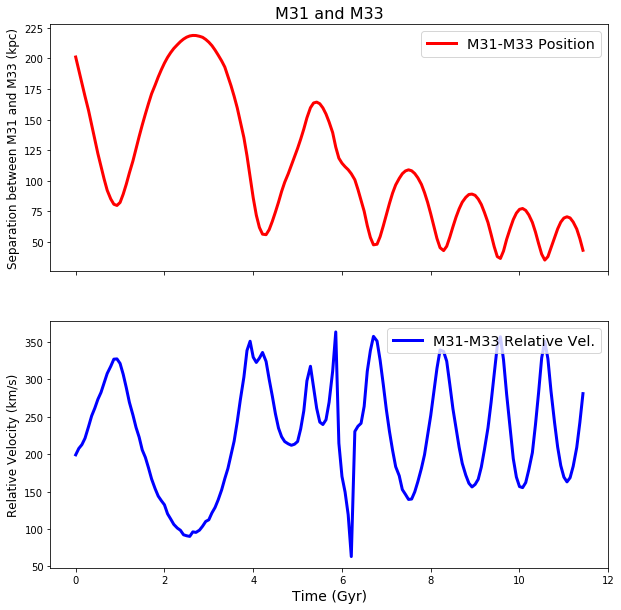

In [116]:
#plotting M31 and M33 position and velocity

f,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10),sharex=True)
ax1.plot(time,POS_m31_m33,color='red',linewidth=3, label='M31-M33 Position')
legend = ax1.legend(loc='upper right',fontsize='x-large')
ax1.set_ylabel('Separation between M31 and M33 (kpc)', fontsize = 12)
ax1.set_title('M31 and M33', fontsize = 16)

ax2.plot(time,VEL_m31_m33,color='blue',linewidth=3, label='M31-M33 Relative Vel.')
ax2.set_ylabel('Relative Velocity (km/s)', fontsize = 12)
ax2.set_xlabel('Time (Gyr)', fontsize = 14)
legend = ax2.legend(loc='upper right',fontsize='x-large')
plt.show()

f.savefig("M31_M33.png")